In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

from scipy.stats import sem

import matplotx
import numpy as np
import pandas as pd

from gptchem.plotsettings import *

%matplotlib inline

In [13]:
all_res = glob("out/**/*.pkl")

In [14]:
load_pickle(all_res[0]).keys()

dict_keys(['representation', 'num_train_points', 'r2', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'rmse', 'mean_absolute_percentage_error'])

In [15]:
compiled_res = []
compiled_gpr = []
compiled_esol = []
compiled_weave = []
compiled_graph_conv = []
compiled_xgb = []

for res in all_res:
    try:
        loaded = load_pickle(res)
        repre = loaded["representation"]
        num_points = loaded["num_train_points"]

        metrics = {
            "representation": loaded["representation"],
            "num_train_points": loaded["num_train_points"],
            "mae": loaded["mean_absolute_error"],
            "max_error": loaded["max_error"],
            "mse": loaded["mean_squared_error"],
        }

        compiled_res.append(metrics)

        gpr_metrics = {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["gpr"]["mean_absolute_error"],
            "max_error": loaded['baseline']["gpr"]["max_error"],
            "mse": loaded['baseline']["gpr"]["mean_squared_error"],
        }

        compiled_gpr.append(gpr_metrics)


        weave_metrics = {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["weave"]["mean_absolute_error"],
            "max_error": loaded['baseline']["weave"]["max_error"],
            "mse": loaded['baseline']["weave"]["mean_squared_error"],
        }

        compiled_weave.append(weave_metrics)

        xgb_metrics = {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["xgb"]["mean_absolute_error"],
            "max_error": loaded['baseline']["xgb"]["max_error"],
            "mse": loaded['baseline']["xgb"]["mean_squared_error"],
        }

        compiled_xgb.append(xgb_metrics)

        graph_conv_metrics =  {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["graph_conv"]["mean_absolute_error"],
            "max_error": loaded['baseline']["graph_conv"]["max_error"],
            "mse": loaded['baseline']["graph_conv"]["mean_squared_error"],
        }

        compiled_graph_conv.append(graph_conv_metrics)

        graph_esol_metrics =  {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["esol"]["mean_absolute_error"],
            "max_error": loaded['baseline']["esol"]["max_error"],
            "mse": loaded['baseline']["esol"]["mean_squared_error"],
        }

        compiled_esol.append(graph_esol_metrics)
    except Exception:
        pass


In [16]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)
compiled_esol = pd.DataFrame(compiled_esol)
compiled_graph_conv = pd.DataFrame(compiled_graph_conv)
compiled_weave = pd.DataFrame(compiled_weave)
compiled_xgb = pd.DataFrame(compiled_xgb)

In [17]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count", sem]
)

In [18]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_esol_grouped = compiled_esol.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_graph_conv_grouped = compiled_graph_conv.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_weave_grouped = compiled_weave.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_xgb_grouped = compiled_xgb.groupby(["num_train_points"]).agg(["mean", "std", sem]) 

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [19]:
compiled_grouped_res

mae                           max_error  \
                                     mean       std count       sem      mean   
representation num_train_points                                                 
InChI          10                1.055595  0.040670     3  0.023481  4.046667   
               20                1.059107  0.033059     3  0.019087  4.063333   
               50                1.060298  0.118000     3  0.068128  3.493333   
               100               1.093988  0.096967     3  0.055984  3.673333   
               200               1.003482  0.043815     2  0.030982  3.975000   
               500               0.953839  0.019319     2  0.013661  3.320000   
SELFIES        10                1.109583  0.092357     3  0.053323  4.056667   
               20                1.051310  0.078534     3  0.045342  3.373333   
               50                1.140119  0.104651     3  0.060420  3.710000   
               100               1.102321  0.054535     3  0.031486  3.396667   
               200               1.119345  0.033657     3  0.019432  3.556667   
               500               1.258839  0.058463     2       NaN  4.080000   
SMILES         10                1.218909  0.056345     9  0.018782  3.685556   
               20                1.222286  0.049883     5  0.022309  3.654000   
               50                1.210804  0.041277     4  0.020638  3.832500   
               100               1.188452  0.012627     3  0.007290  3.716667   
               200               1.200417  0.065782     3  0.037979  3.800000   
               500               1.233095  0.058426     3  0.033732  3.720000   

                                                                mse            \
                                      std count       sem      mean       std   
representation num_train_points                                                 
InChI          10                0.334863     3  0.193333  1.939936  0.197418   
               20                0.314696     3  0.181690  1.953468  0.194653   
               50                0.438216     3  0.253004  1.994782  0.391099   
               100               0.025166     3  0.014530  1.961585  0.330329   
               200               0.388909     2  0.275000  1.866038  0.111777   
               500               0.537401     2  0.380000  1.618199  0.198203   
SELFIES        10                1.241303     3  0.716667  2.055405  0.424281   
               20                0.095044     3  0.054874  1.711831  0.190066   
               50                0.463573     3  0.267644  2.044331  0.327598   
               100               0.620027     3  0.357973  1.973343  0.316548   
               200               0.510718     3  0.294863  2.036574  0.155914   
               500               0.862670     2       NaN  2.633429  0.347140   
SMILES         10                0.300837     9  0.100279  2.414464  0.208333   
               20                0.170822     5  0.076394  2.405990  0.188566   
               50                0.385433     4  0.192716  2.455096  0.085371   
               100               0.155027     3  0.089505  2.361480  0.129482   
               200               0.121655     3  0.070238  2.340902  0.213992   
               500               0.185203     3  0.106927  2.622690  0.245734   

                                                 
                                count       sem  
representation num_train_points                  
InChI          10                   3  0.113979  
               20                   3  0.112383  
               50                   3  0.225801  
               100                  3  0.190715  
               200                  2  0.079038  
               500                  2  0.140151  
SELFIES        10                   3  0.244959  
               20                   3  0.109734  
               50                   3  0.189139  
               100                

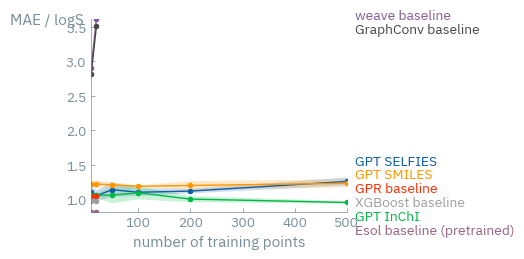

In [21]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["SELFIES", :].index,
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"],
    label="GPT SELFIES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SELFIES", :].index,
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
    alpha=0.2,
)

ax.plot(
    compiled_grouped_res.loc["InChI", :].index,
    compiled_grouped_res.loc["InChI", :]["mae"]["mean"],
    label="GPT InChI",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["InChI", :].index,
    compiled_grouped_res.loc["InChI", :]["mae"]["mean"]
    - compiled_grouped_res.loc["InChI", :]["mae"]["std"],
    compiled_grouped_res.loc["InChI", :]["mae"]["mean"]
    + compiled_grouped_res.loc["InChI", :]["mae"]["std"],
    alpha=0.2,
)



ax.plot(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    alpha=0.2,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
    alpha=0.2,
)

ax.plot(
    compiled_weave_grouped.loc[:].index,
    compiled_weave_grouped["mae"]["mean"],
    label="weave baseline",
    marker="o",
)

ax.fill_between(
    compiled_weave_grouped.loc[:].index,
    compiled_weave_grouped.loc[:]["mae"]["mean"] - compiled_weave_grouped.loc[:]["mae"]["std"],
    compiled_weave_grouped.loc[:]["mae"]["mean"] + compiled_weave_grouped.loc[:]["mae"]["std"],
    alpha=0.2,
)


ax.plot(
    compiled_graph_conv_grouped .loc[:].index,
    compiled_graph_conv_grouped["mae"]["mean"],
    label="GraphConv baseline",
    marker="o",
)

ax.fill_between(
    compiled_graph_conv_grouped.loc[:].index,
    compiled_graph_conv_grouped.loc[:]["mae"]["mean"] - compiled_graph_conv_grouped.loc[:]["mae"]["std"],
    compiled_graph_conv_grouped.loc[:]["mae"]["mean"] + compiled_graph_conv_grouped.loc[:]["mae"]["std"],
    alpha=0.2,
)

ax.plot(
    compiled_xgb_grouped .loc[:].index,
    compiled_xgb_grouped["mae"]["mean"],
    label="XGBoost baseline",
    marker="o",
)

ax.fill_between(
    compiled_xgb_grouped.loc[:].index,
    compiled_xgb_grouped.loc[:]["mae"]["mean"] - compiled_xgb_grouped.loc[:]["mae"]["std"],
    compiled_xgb_grouped.loc[:]["mae"]["mean"] + compiled_xgb_grouped.loc[:]["mae"]["std"],
    alpha=0.2,
)

ax.plot(
    compiled_esol_grouped .loc[:].index,
    compiled_esol_grouped["mae"]["mean"],
    label="Esol baseline (pretrained)",
    marker="o",
)

ax.fill_between(
    compiled_esol_grouped.loc[:].index,
    compiled_esol_grouped.loc[:]["mae"]["mean"] - compiled_esol_grouped.loc[:]["mae"]["std"],
    compiled_esol_grouped.loc[:]["mae"]["mean"] + compiled_esol_grouped.loc[:]["mae"]["std"],
    alpha=0.2,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / logS", y_pad=-0.1)
# ax.set_xscale('log')

# range_frame(
#     ax, 
#      compiled_gpr_grouped.loc[:].index,
#      np.array([compiled_weave_grouped["mae"]["mean"],compiled_esol_grouped.loc[:]["mae"]["mean"]])
# )

fig.savefig("solubility_regression_res.pdf", bbox_inches="tight")